___
# Linear Regression Project


Background of the project: *we just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired us on contract to help them figure it out!*

The main goal of this notebook, after an exploratory data analysis of the customer data, is to use linear regression for a regression task and help the Ecommerce company to make its decisions. Since It's always a simulation, the informations in the dataset are fake (no you real credit card numbers or emails of course).

## Project preparation

### Imports

In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline

Regarding the imports, some of them (especially the ones for the linear regression), will be imported later.

### Get the Data


We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

Let's read the csv file to get the data.

In [14]:
df = pd.read_csv("data/Ecommerce Customers")

We now check the first important informations of the dataset: its head, a description with the most valuable statistical information and the columns infos.

In [15]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [16]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis (EDA)

**Let's explore the data!**

(a little sidenote: for the rest of the exercise we'll only be using the numerical data of the csv file.)

As a kickstart, we can use seaborn to create a jointplot and compare the **Time on Website** with the **Yearly Amount Spent** columns.

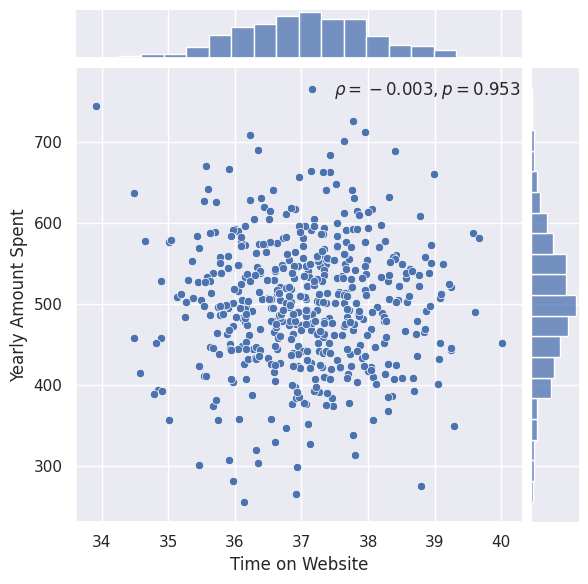

In [18]:
g = sns.jointplot(data=df, x='Time on Website', y='Yearly Amount Spent',  height=6, ratio=8)
r, p = stats.pearsonr(df['Time on Website'], df['Yearly Amount Spent'])
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.579, 0.95), xycoords='axes fraction',
                    ha='left', va='center')
plt.show()


From the jointplot, and more accurately from the pearson correlation coefficient, the correlation between these 2 features does not make sense. 

Let's do the same thing but with the **Time on App** and the **Yearly Amount Spent** columns.

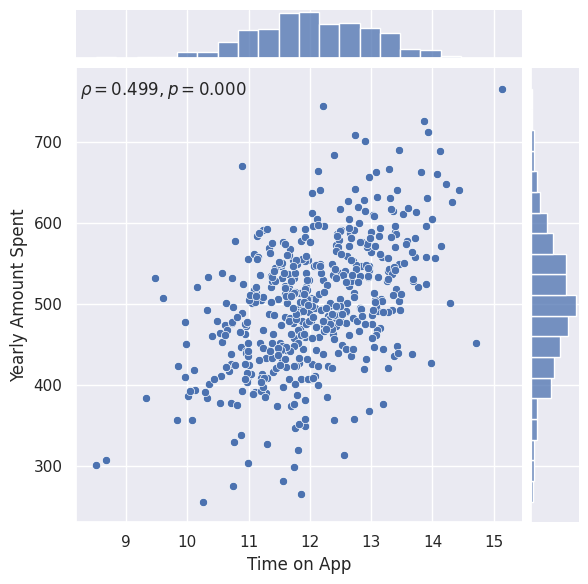

In [19]:
g = sns.jointplot(data=df, x='Time on App',
                  y='Yearly Amount Spent',  height=6, ratio=8)
r, p = stats.pearsonr(df['Time on App'], df['Yearly Amount Spent'])
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.01, 0.95), xycoords='axes fraction',
                    ha='left', va='center')
plt.show()

Comparing with the "Time on Website" case, the correlation start to make sense. In particular, with a pearson correlation of 0.5, the time spent on the app and Yearly amount spent are positively correlated.

Since jointplot is a powerful tool in data visualization, we'll use it again to create a 2D hex bin plot comparing **Time on App** and **Length of Membership**.

Text(0.06, 0.92, '$\\rho = 0.029, p = 0.516$')

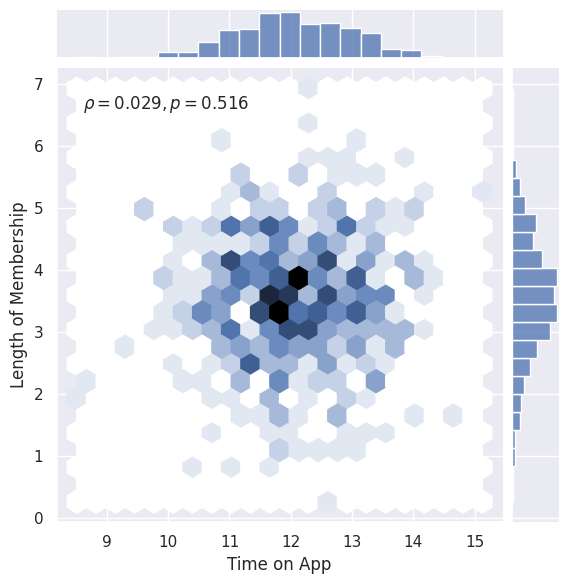

In [20]:
g = sns.jointplot(data=df, x='Time on App',
                  y='Length of Membership', height=6, ratio=8, kind='hex')
r, p = stats.pearsonr(df['Time on App'], df['Length of Membership'])
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.06, 0.92), xycoords='axes fraction',
                    ha='left', va='center')

We have a very similar situation to the correlation between the time spent on Website and yealy amount spent: the relation doesn't make sense. This is also confirmed by the the Pearson correlation coefficient, whicj is very close to 0.

Now, for a larger overview of the data let's explore these types of relationships across the entire data set. We'll use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to accomplish this task.

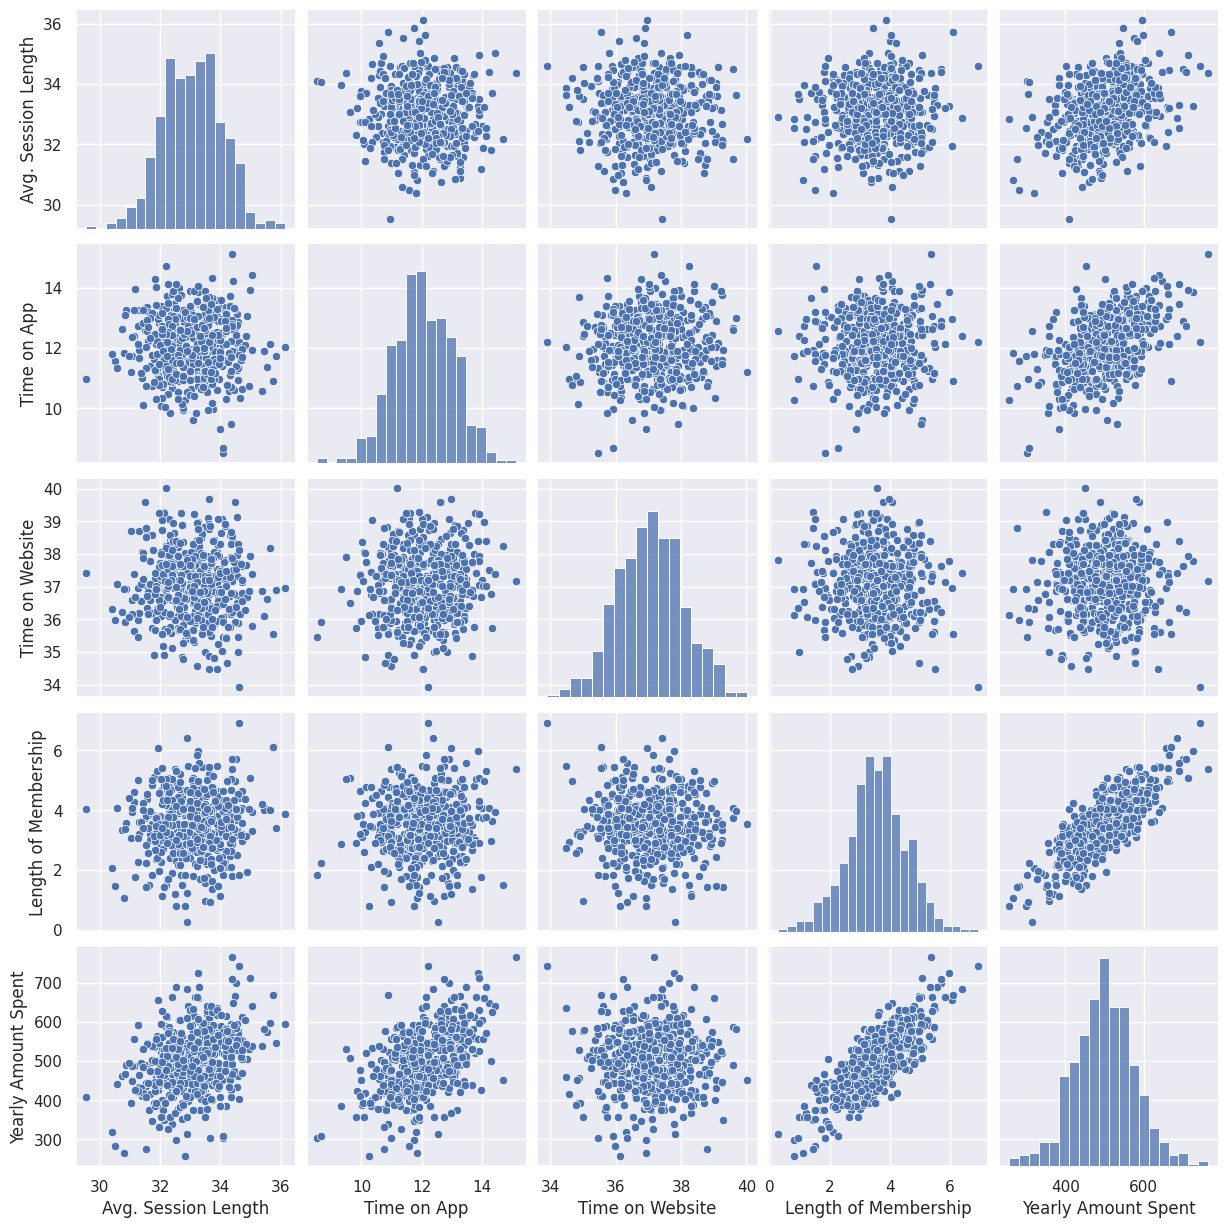

In [21]:
sns.pairplot(data=df)

We start to see something interesting with the features correlations. To have a clearer view we'll plot a hetmap:

<Axes: >

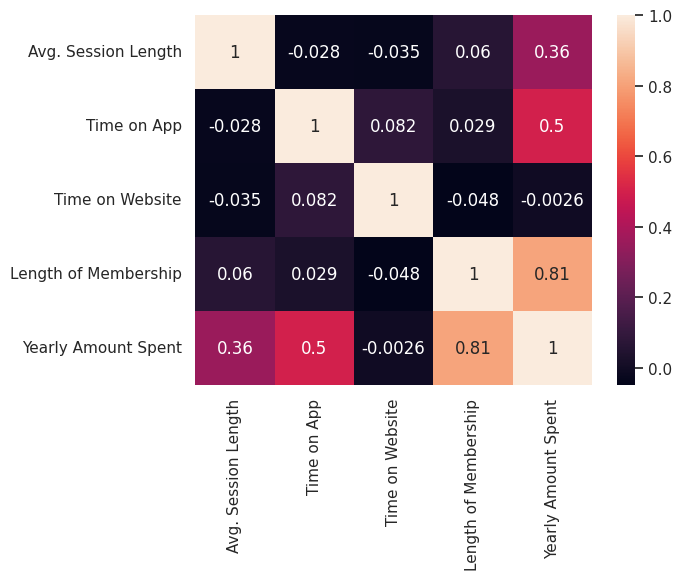

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

The heatmap shows immediatly the most correlated features: the **length of membership** and the **yearly amount spent**, with a person coefficient of *0.81*.

To better visualize this almost-perfect correlation, we'll plot an *lmplot* both with seaborn and in an interactive version. 

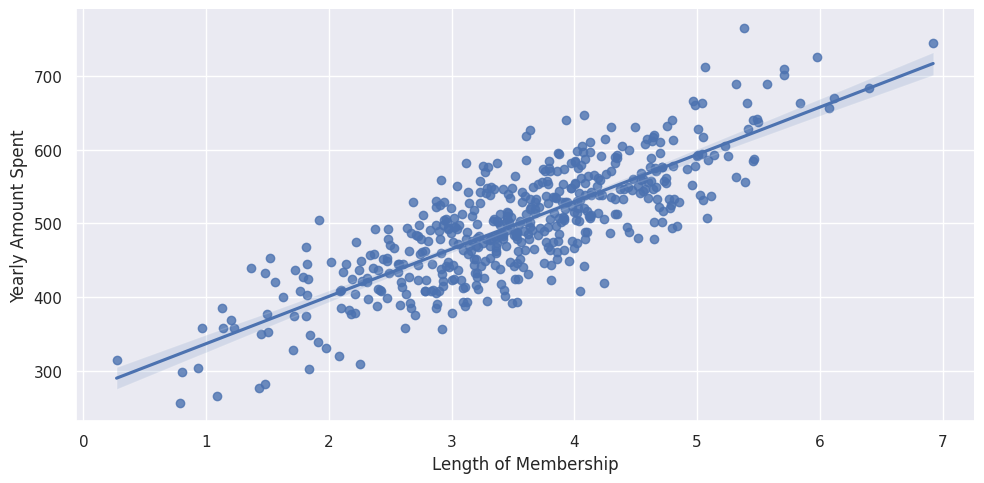

In [23]:
sns.lmplot(data=df, x='Length of Membership', y='Yearly Amount Spent', height=5, aspect=2)

In [24]:
import plotly.express as px

px.scatter(df, x='Length of Membership', y='Yearly Amount Spent', trendline='ols')

## Traning and make predictions with a linear regression model

Now that we complete a first EDA and visualizing the information in our dataset, we can build a linear regression model with the goal to predict in which platform the Ecommerce should focus on. To recall the linear repression model structure (the simple one, in particular):

<div align="center"> Y = β<sub>0</sub> + β<sub>1</sub>X </div>

Where:
- **X**: the feature variables that I'll use to predict our target variable.
- **Y**: the label we want to predict (or output variable). In our case, the Y label is MEDV.
- **β<sub>0</sub>**: also called *interceptor*, it represents the value of Y when all values of the features in X are 0.
-  **β<sub>1</sub>**: also called *coefficient*, it'll represents instead the vector of coeffients, one for each feature in X. What the coefficients mean is the increase of the value of the target Y for one unit of the associated variable in X.

### Training and Testing Data

Let's go ahead and split the data into training and testing sets. 

For first, we a variable **X** equal to the numerical features of the customers and a variable *y* equal to the "Yearly Amount Spent" column.

In [25]:
# numerical fetures / predictors
X = df.select_dtypes(include=['float64', 'int64']).drop(
    columns='Yearly Amount Spent')

# output label
y = df['Yearly Amount Spent']

Now, we'll **model_selection.train_test_split** from *sklearn* to split the features data into training and testing sets (with *test_size=0.3* and *random_state=101*).

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

Now it's time to train our model on our training data!

We start by importing **LinearRegression** from *sklearn.linear_model* and creating an instance of it.

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

With the instance of *LinearRegression()*, we finally Train/fit the model on the training data.

In [29]:
lm.fit(X_train, y_train)

LinearRegression()

Now that the model is trained, let's print out the coefficients obtained:

In [30]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

### Predicting Test Data

Now that we have fit our model, let's make some predictions!

We'll use **lm.predict()** to predict off the *X_test* set of the data.

In [31]:
predictions = lm.predict(X_test)

To start to see how our prediction went, let's create a scatterplot of the real test values versus the predicted values.

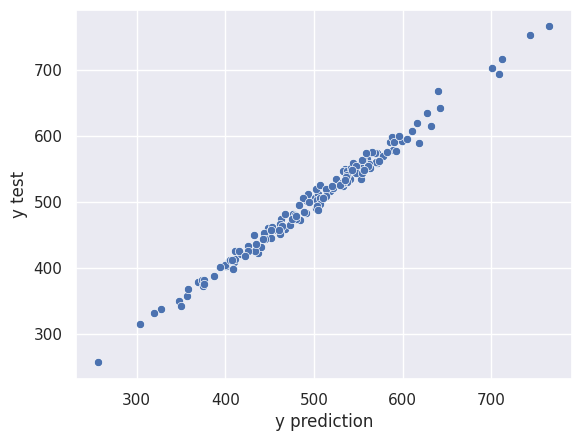

In [32]:
predict_plot = sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('y prediction')
plt.ylabel('y test')

plt.show()

### Residuals

We should have gotten a very good model with a good fit. Before seeing some error metrics to really evaluate the model, let's quickly explore the residuals to make sure everything was okay with our data. 

We'll permorm this task by plotting a histogram of the residuals and make sure it looks normally distributed.

In [34]:
import plotly.figure_factory as ff

fig = ff.create_distplot([y_test-predictions], group_labels=['Residuals'], show_rug=False)
fig.update_layout(width=1000, height=600)
fig.show()

### Evaluating the Model

It's time to evaluate the linear regression model created. We're going to use the most common metrics for this kind of problems:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))
print('Explained Variance Score: ', explained_variance_score(y_test, predictions))

MAE:  7.228148653430826
MSE:  79.81305165097427
RMSE:  8.933815066978624
Explained Variance Score:  0.9890771231889606


### Conclusion

Although the EDA and the predictions made with a linear regression model, we still want to figure out the answer to the original question: do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important? Let's see if we can interpret the coefficients of the model created at all to get an idea.

In [35]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


These coefficient can be interpreted as follows:

- With all other features fixed, a 1 unit increase of the **average session length** is associated to an *increase of $25.98 in yearly amount spent*.
- With all other features fixed, a 1 unit increase of the **time on app** is associated to an *increase of $38.59 in yearly amount spent*.
- With all other features fixed, a 1 unit increase of the **time on website** is associated to an *increase of $0.19 in yearly amount spent*.
- With all other features fixed, a 1 unit increase of the **length of the membership** is associated to an *increase of $61.28 in yearly amount spent*.

Intepreting the linear model coefficient, I think the company should focus more on their mobile app rather than their website. The increase of the time spent on the app would generate way more yearly revenues, comaparing to the revenues obtained with an increase of the time spent on the website.

Besides that, also improving the website is not a bad idea, considering an already-working app. And the work on the website can be done in a way to redirect users to the app and increase the yearly amount spent in the same way.